In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


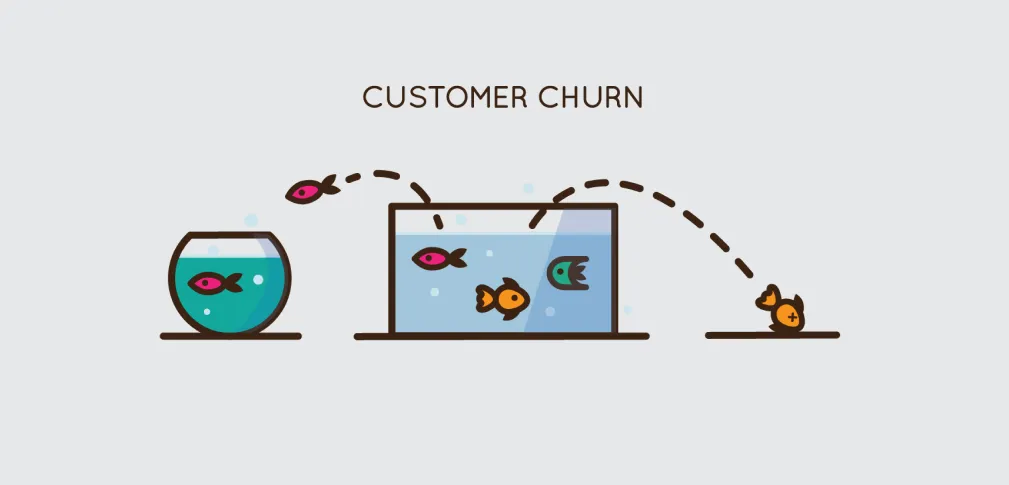

# **Problem Statement**

**Background:**
Customer churn is the rate at which customers stop doing business with a company. High churn results in revenue loss and increased marketing expenses to acquire new customers.

**Business Problem**
The telecom company is experiencing a significant number of customers terminating the services. The management needs to identify the main drivers of churn to implement targeted retention strategies.

**Goal**
1. Identify main/key factors contributing to churn of customers.
2. Recommend actionable strategies to reduce future churn.

**Expected Outcome**
1. Top churn predictors or attributes.
2. Visual insights showing churn trends based on various features.
3. Recommendations for reducing churn in high-risk customer segments.

# Analysis Plan

**1. Data Exploration -**

   * Check data types and missing values
   * Separate categorical and numerical features.


**2. Exploratory Data Analysis (EDA) -**
   * Compare churn vs. non-churn for each feature.
   * Visualize high-churn segments.
   * Identify correlations between numeric features.

**3. Feature Engineering -**
   * Encode categorical variables.
   * Handle missing values.
   * Balance churn classes.

**4. Model Building -**
  * Apply classification algorithms (Logistic Regression,SVC Classifier, XG Boost Classifier and Random Forest).
  * Evaluate performance using accuracy.

**5. Insights & Recommendations -**
  * Rank features by importance.
  * Translate results into business actions.

**Note:** We begin with installing some extra packages, so that we can use SMOTE in our analysis further ahead.

In [2]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
#importing data
df = pd.read_csv(r'/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Data types and column type checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Changing TotalCharges column type from object to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') 
df.info()
#Checking for missing values
df.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Investigating data with missing values
df[df['TotalCharges'].isnull()]
df[df['tenure'] == 0]
df['TotalCharges'].replace("", pd.NA, inplace=True) 
#Replacing missing values in column TotalCharges with 0
df['TotalCharges'] = df['TotalCharges'].fillna(0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Note**: When checked for observations with missing TotalCharges, it was found that all of them belonged to tenure = 0, which could mean that they did not pay anything as it was beginning of the service. Therefore the missing values in this column were replaced by 0.

In [7]:
#Removing unwanted column of customerID
df = df.drop(['customerID'], axis = 1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [8]:
#Analysing categories in categorical columns
categorical_features = df.select_dtypes(include = 'object').columns
numerical_features = df.select_dtypes(exclude = 'object').columns

for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: gender
['Female' 'Male']
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
Column: OnlineBackup
['Yes' 'No' 'No internet service']
----------------------------------------
Column: DeviceProtection
['No' 'Yes' 'No internet service']
----------------------------------------
Column: TechSupport
['No' 'Yes' 'No internet service']
----------------------------------------
Column: StreamingTV
['No' 'Yes' 'No internet service']
----------------------------------------
Column: StreamingMovies
['No' 'Y

In [9]:
#Correcting values in categorical columns
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')
#Checking once again
for col in categorical_features:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)


Column: gender
['Female' 'Male']
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No' 'Yes']
----------------------------------------
Column: OnlineBackup
['Yes' 'No']
----------------------------------------
Column: DeviceProtection
['No' 'Yes']
----------------------------------------
Column: TechSupport
['No' 'Yes']
----------------------------------------
Column: StreamingTV
['No' 'Yes']
----------------------------------------
Column: StreamingMovies
['No' 'Yes']
----------------------------------------
Column: Contract
['Month-to-month' 'One year' 'Two year']
-------------------------

# Exploratory Data Analysis (EDA)

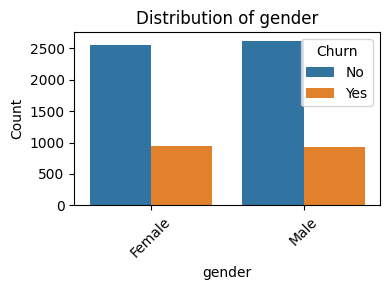

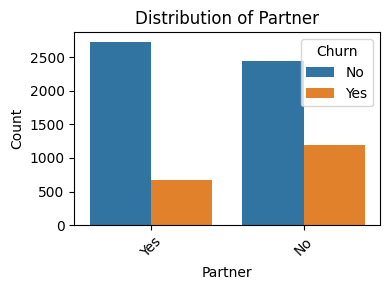

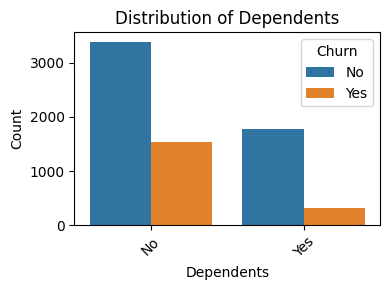

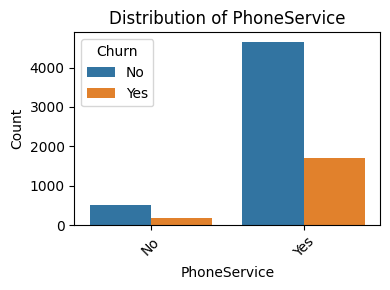

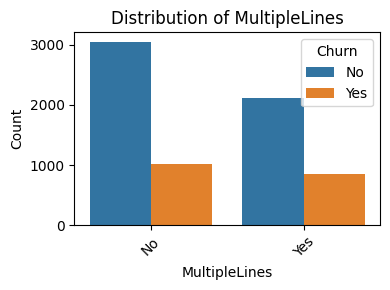

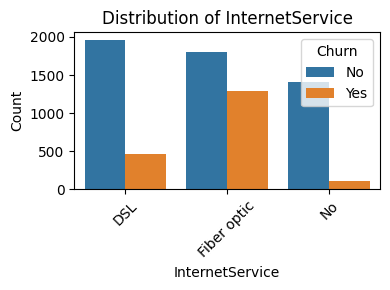

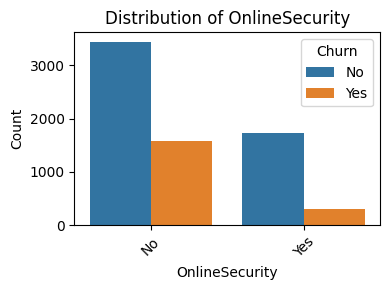

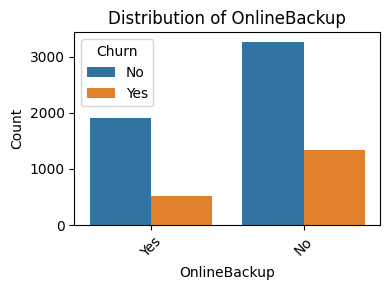

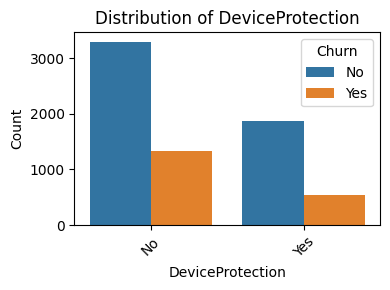

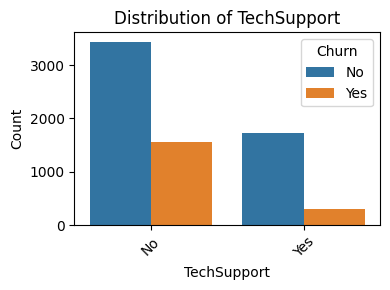

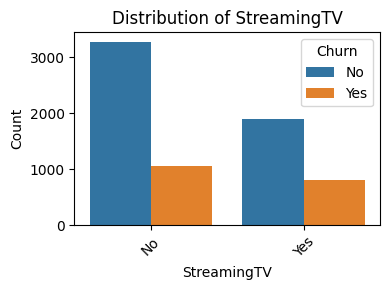

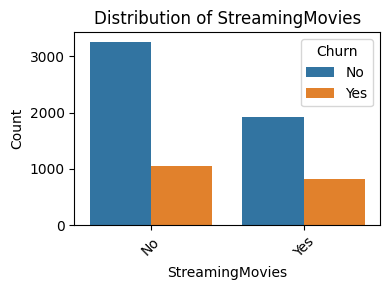

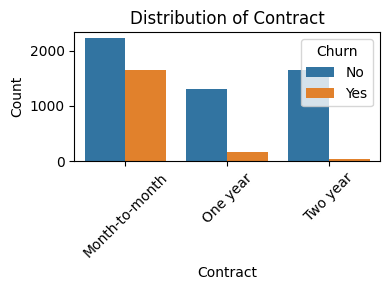

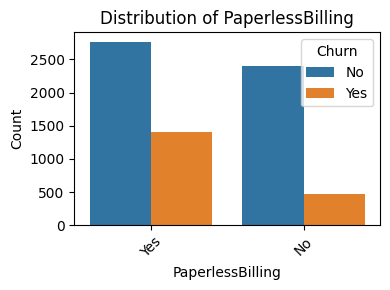

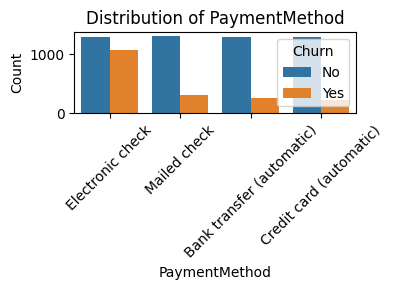

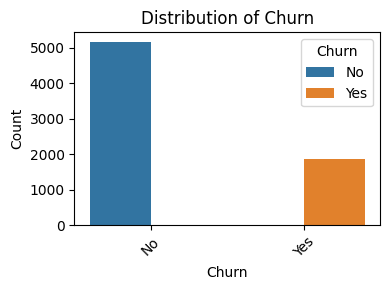

In [10]:
#Visualizing Categorical features
def plot_categorical_features(df):
    for col in categorical_features:
        plt.figure(figsize=(4,3))
        sns.countplot(data = df, x = col, hue = 'Churn')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation = 45)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
plot_categorical_features(df)

**Insights -**
1. Fiber Optics users have chured a lot - recommend to check for its performance or charges if high/low.
2. No tech support to users have also resulted in high churn - suggest to improve tech services and more reachable to users.
3. Month to month contract users have high churn rate, two year users have the least - recommend give more offers for short contracts or try to have longer contracts instead.
4. Users with payment method of Electronic check have high churn rate - suggest make payments more convenient, offer discounts or vouchers to switch to other payment methods.
5. Users who do not have dependents have churned high - suggest to offer discounts or vouchers for such group.
6. Dataset has imbalanced Churn class.

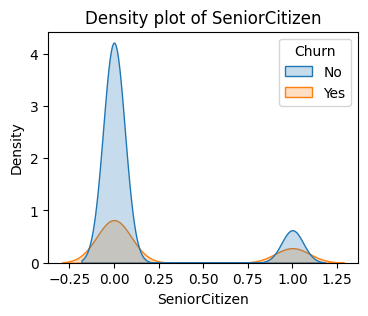

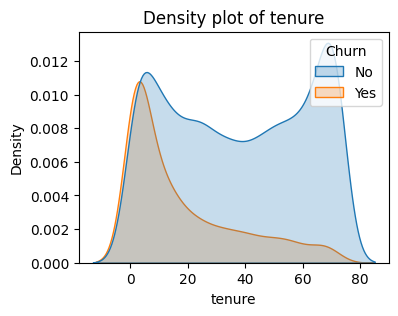

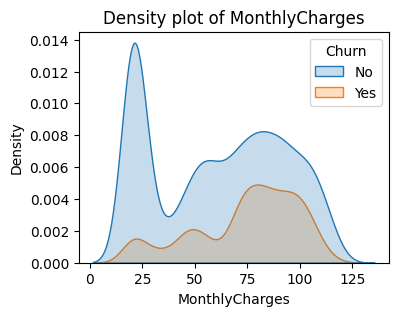

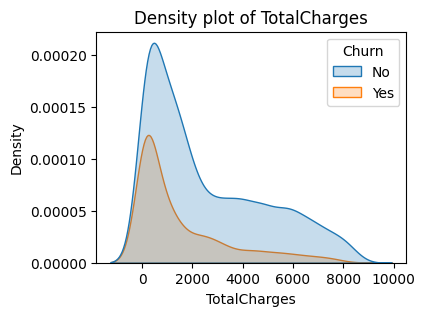

In [11]:
#Numerical features analysis
def plot_numerical_features(df):
    for col in numerical_features:
        plt.figure(figsize=(4,3))
        sns.kdeplot(data = df, x = col, hue = 'Churn', fill = True)
        plt.title(f'Density plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.show()

plot_numerical_features(df)

**Insights -**
1. Users have churned within first few months of tenure say 0 to 15 months - enhance onboarding, provide early incentives to increase retention within first few months.
2. Users paying high monthly charges have churned more - provide flexible pricing, offer discounts or vouchers.

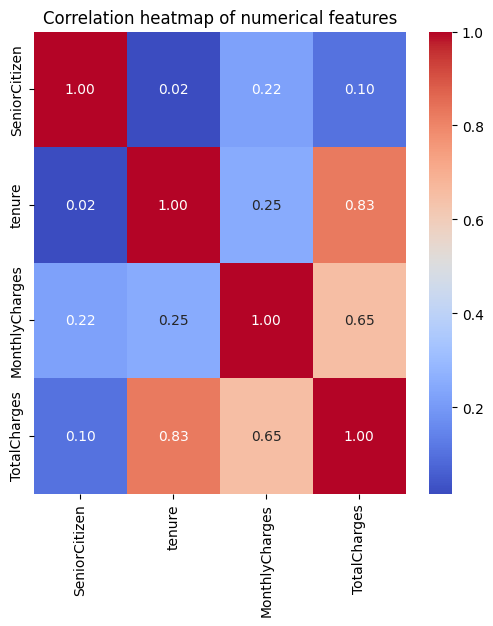

In [12]:
#Correlation heatmap of Numerical features to find correlated attributes
def plot_correlation_heatmap(df):
    corr_matrix = df[numerical_features].corr()
    plt.figure(figsize =(6,6))
    sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap = 'coolwarm', cbar = True)
    plt.title('Correlation heatmap of numerical features')
    plt.show()
    
plot_correlation_heatmap(df)

**Insights:** Tenure & TotalCharges are highly related with correlation of 0.83 - Seems obvious because the more tenure, the more charges to be paid. Suggested to remove TotalCharges column to proceed with analysis. SeniorCitizen can be ignored as it is a Categorical column with 0 & 1 as values.

In [13]:
#Dropping TotalCharges column
df = df.drop(['TotalCharges'], axis = 1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No


# Feature Engineering

In [14]:
#Convert all the binary categorical fetaures into respective numerical features
Binary_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                   'StreamingMovies', 'PaperlessBilling', 'Churn'] 
for col in Binary_features:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)
    
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1


In [15]:
#Convert multiple category features to numeric
multiple_cat_features = ['InternetService', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns = multiple_cat_features, drop_first=True).astype(int)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,53,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,42,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70,1,1,0,0,0,0,1,0


In [16]:
#Standardize numeric features
num_features = ['tenure', 'MonthlyCharges']
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# Modelling

**Note -** Since the Churn class is imbalanced, we will first divide the train and test data set and then for the training dataset, balance both the classes using resampling

In [17]:
#Generate train and test datasets
X = df_encoded.drop(['Churn'], axis = 1)
y = df_encoded['Churn'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = y)
#Proceed with resampling to balance classes
#Convert train dataset to DataFrame for easier handling
train_df = pd.concat([X_train,y_train], axis = 1)

# Separate majority and minority
majority_df = train_df[train_df['Churn'] == 0]
minority_df = train_df[train_df['Churn'] == 1]

# Oversample minority
minority_oversampled = minority_df.sample(
    n=len(majority_df),  # match majority size
    replace=True,        # sampling with replacement
    random_state=42
)

# Combine back
train_balanced_df = pd.concat([majority_df, minority_oversampled])

# Get X_train and y_train back
X_train_balanced = train_balanced_df.drop(columns=['Churn']).values
y_train_balanced = train_balanced_df['Churn'].values

print("Before:", y_train.value_counts().to_dict())
print("After:", pd.Series(y_train_balanced).value_counts().to_dict())

Before: {0: 4139, 1: 1495}
After: {0: 4139, 1: 4139}


In [18]:
#Modelling Logistic Regression
log_reg = LogisticRegression()
model = log_reg.fit(X_train_balanced, y_train_balanced)
y_pred_lr = model.predict(X_test)
accuracy_score = model.score(X_test, y_test)
print('Logistic Regression accuracy is: ', accuracy_score)

#Modelling SVC Classifier
svc = SVC()
model_svc = svc.fit(X_train_balanced, y_train_balanced)
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = model_svc.score(X_test, y_test)
print('Support Vector Classifier accuracy is: ', accuracy_svc)

#Modelling XG Boost Classifier
xgb = XGBClassifier()
model_xgb = svc.fit(X_train_balanced, y_train_balanced)
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = model_xgb.score(X_test, y_test)
print('XG Boost Classifier accuracy is: ', accuracy_xgb)

#Modelling Random Forest Classifier
rand_bst = RandomForestClassifier()
model_rf = rand_bst.fit(X_train_balanced, y_train_balanced)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = model_rf.score(X_test, y_test)
print('Random Forest accuracy is: ', accuracy_rf)

Logistic Regression accuracy is:  0.7381121362668559
Support Vector Classifier accuracy is:  0.7452093683463449
XG Boost Classifier accuracy is:  0.7452093683463449
Random Forest accuracy is:  0.765791341376863


**Insights -** Random Forest has the highest accuracy of 77%

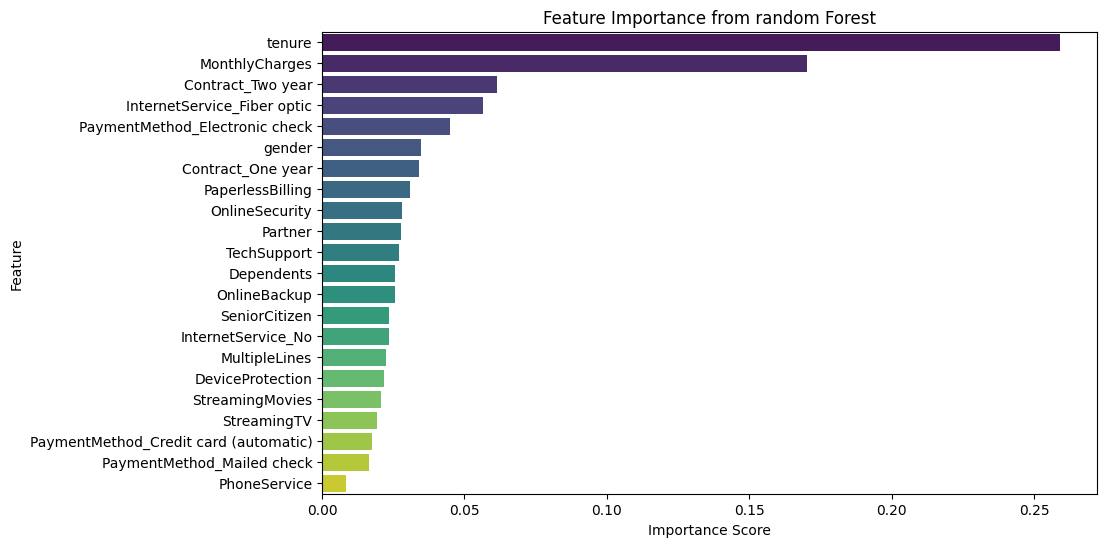

In [19]:
#Feature importance scores from Random Forest
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X_train.columns)
feature_importance = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_balanced_df.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x = feature_importance_df['Importance'], y = feature_importance_df['Feature'], palette = 'viridis')
plt.title('Feature Importance from random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Insights & Recommendations

**Insights -**
1. Customer churn is highest among new users within the first 15 months of joining. 
2. Customers who pay high monthly charges and have short term contracts are at the highest risk of churning.

**Recommendations -**
1. The company can enhance onboarding of new customers and provide early incentives to increase retention during first few months.
2. the company can offer discounts or vouchers to customers with high monthly charges.